Building a Neural Network form Scratch using the MINST Dataset

#1.Installing dependencies

In [4]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import opendatasets as od

In [6]:
data = od.download('https://www.kaggle.com/competitions/digit-recognizer/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aparpokhrel
Your Kaggle Key: ··········


100%|██████████| 15.3M/15.3M [00:00<00:00, 73.7MB/s]



Extracting archive ./digit-recognizer/digit-recognizer.zip to ./digit-recognizer


In [7]:
pandasData = pd.read_csv('/content/digit-recognizer/train.csv')

In [8]:
pandasData.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##1.1 Splitting dataset

In [73]:
Data = np.array(pandasData)
m,n = Data.shape
np.random.shuffle(Data)

data_valid = Data[0:1000].T
Y_valid = data_valid[0]
X_valid = data_valid[1:n]
X_valid = X_valid / 255.

data_train = Data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [74]:
Y_train


array([4, 3, 3, ..., 0, 2, 7])

#2. Initalizing parameters

In [75]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2


#ReLU activativation function
def ReLU(Z):
    return np.maximum(Z, 0)


#softmax activation for output layer
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    

# return the derivate of the reLU function
def ReLU_deriv(Z):
    return Z > 0


#encode Y labels
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y




#2.1 Forward propagation

In [76]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

  

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


#2.2 Bakward propagation

In [77]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2




##2.3 Upadate parameters





In [78]:

#upadte the parameters after propagation
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [79]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

## 2.4 Gradient Descent

In [ ]:

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2




#3. Running the model

In [81]:
#learning rate = 0.10
#iterations = 500
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[8 8 6 ... 6 8 0] [4 3 3 ... 0 2 7]
0.09634146341463415
Iteration:  10
[8 8 6 ... 3 6 8] [4 3 3 ... 0 2 7]
0.1438780487804878
Iteration:  20
[9 8 6 ... 0 6 8] [4 3 3 ... 0 2 7]
0.201609756097561
Iteration:  30
[9 6 6 ... 0 6 8] [4 3 3 ... 0 2 7]
0.28368292682926827
Iteration:  40
[9 3 6 ... 0 2 8] [4 3 3 ... 0 2 7]
0.35817073170731706
Iteration:  50
[9 3 6 ... 0 6 7] [4 3 3 ... 0 2 7]
0.42104878048780486
Iteration:  60
[9 3 6 ... 0 6 7] [4 3 3 ... 0 2 7]
0.4676585365853659
Iteration:  70
[9 3 6 ... 0 6 7] [4 3 3 ... 0 2 7]
0.5018048780487805
Iteration:  80
[9 3 6 ... 0 6 7] [4 3 3 ... 0 2 7]
0.529
Iteration:  90
[9 3 6 ... 0 6 7] [4 3 3 ... 0 2 7]
0.5490487804878049
Iteration:  100
[9 3 6 ... 0 6 7] [4 3 3 ... 0 2 7]
0.5684146341463414
Iteration:  110
[9 3 6 ... 0 6 7] [4 3 3 ... 0 2 7]
0.5865609756097561
Iteration:  120
[9 3 6 ... 0 6 7] [4 3 3 ... 0 2 7]
0.6032195121951219
Iteration:  130
[9 3 6 ... 0 6 7] [4 3 3 ... 0 2 7]
0.6175609756097561
Iteration:  140
[9 3 6 ... 

Accuracy : ~ 82% on training data

#4.1 Making predicitions of labels

Prediction:  [4]
Label:  4


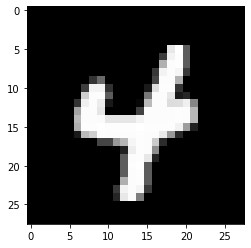

In [82]:
test_prediction(0, W1, b1, W2, b2)

Prediction:  [3]
Label:  3


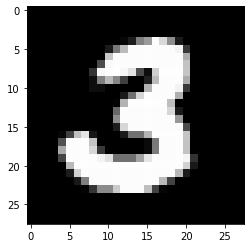

In [83]:
test_prediction(1, W1, b1, W2, b2)


Prediction:  [1]
Label:  3


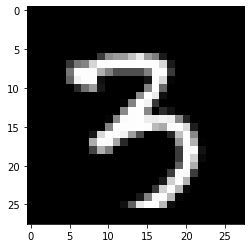

In [84]:
test_prediction(2, W1, b1, W2, b2)


Prediction:  [6]
Label:  6


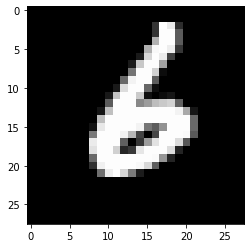

In [85]:
test_prediction(3, W1, b1, W2, b2)

Prediction:  [0]
Label:  4


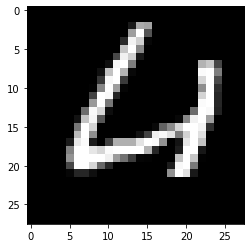

In [86]:
test_prediction(4, W1, b1, W2, b2)


Prediction:  [9]
Label:  9


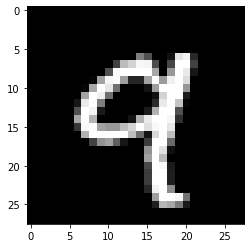

In [87]:
test_prediction(5, W1, b1, W2, b2)


Prediction:  [0]
Label:  0


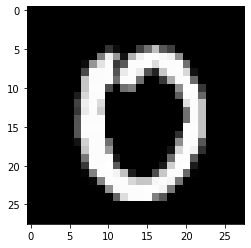

In [88]:
test_prediction(6, W1, b1, W2, b2)


Prediction:  [4]
Label:  4


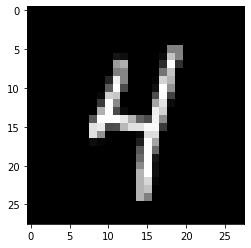

In [89]:
test_prediction(7, W1, b1, W2, b2)


Prediction:  [3]
Label:  3


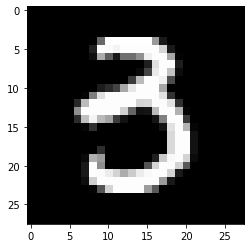

In [90]:
test_prediction(8, W1, b1, W2, b2)


Prediction:  [5]
Label:  5


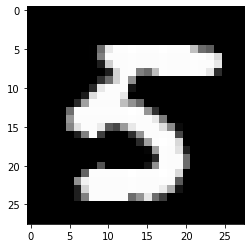

In [91]:
test_prediction(9, W1, b1, W2, b2)


In [97]:
dev_predictions = make_predictions(X_valid, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_valid) 

[9 8 7 2 1 4 4 6 9 4 8 7 5 7 6 8 9 9 3 5 4 7 8 7 3 4 4 7 8 1 1 2 1 7 5 2 4
 9 9 4 8 7 0 0 6 5 1 9 1 4 6 8 8 5 0 4 8 2 7 9 6 3 0 2 9 8 3 3 0 8 7 3 4 2
 9 9 7 1 9 5 3 4 7 8 9 5 3 9 8 6 5 3 1 7 9 1 5 0 5 0 4 8 1 4 3 8 3 2 8 3 5
 7 5 5 3 7 5 4 5 3 9 3 0 7 2 7 4 1 4 9 4 9 3 9 8 5 6 1 3 3 2 4 0 9 9 1 5 3
 0 1 7 0 5 7 5 7 0 4 2 4 6 4 7 1 6 0 1 7 7 7 3 4 4 6 1 8 0 2 8 0 7 2 5 2 5
 8 8 3 1 8 8 0 7 2 8 6 6 6 2 1 9 3 5 9 0 2 6 5 6 3 9 6 2 2 6 2 1 5 7 1 9 0
 2 5 2 7 5 4 3 4 5 7 1 9 8 4 3 9 8 7 9 8 2 0 2 2 2 9 2 9 3 7 7 6 6 2 3 1 6
 3 0 1 2 0 0 1 0 3 8 6 6 5 5 4 2 2 2 7 7 7 1 5 2 7 5 5 4 3 7 2 3 4 1 7 8 6
 0 0 4 8 1 4 1 4 1 9 9 9 9 4 6 6 8 2 0 6 8 1 0 5 6 4 0 7 6 7 9 5 4 7 8 1 7
 3 1 7 1 2 4 7 3 1 9 9 7 9 0 6 2 4 6 6 3 1 4 8 9 9 3 6 3 0 5 1 2 1 6 3 8 1
 7 6 7 3 8 3 8 1 5 8 0 1 8 3 2 2 1 1 2 3 6 6 7 1 0 9 9 0 1 8 8 1 7 4 8 9 1
 3 7 4 6 0 8 8 2 6 1 7 2 6 6 5 1 9 7 7 7 6 4 5 6 1 5 6 9 6 1 8 4 7 7 8 8 2
 5 5 2 8 7 5 6 6 7 2 9 3 9 5 0 1 2 6 5 0 1 4 4 8 2 7 1 6 1 3 9 5 2 8 1 3 4
 1 0 7 6 1 3 0 4 0 0 7 9 

0.816

~82% accuracy on validation set